In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/titanic.csv", skipinitialspace=True)

In [3]:
#missing values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Age'] = df['Age'].groupby([df['Sex'], df['Pclass']]).apply(lambda x: x.fillna(x.median()))

#remove useless variables
column2drop = ['PassengerId', 'Name', 'Cabin', 'Ticket', 'SibSp', 'Parch']
df.drop(column2drop, axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

df['Sex'].values[:5]

df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked')], axis=1)
df = df.drop('Embarked', axis=1)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,0,0,1
1,1,1,0,38.0,71.2833,1,0,0
2,1,3,0,26.0,7.9250,0,0,1
3,1,1,0,35.0,53.1000,0,0,1
4,0,3,1,35.0,8.0500,0,0,1


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [6]:
attributes = [col for col in df.columns if col != 'Survived']
X = df[attributes].values
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [7]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=10, min_samples_leaf=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=10)

## Bonus: Confusion Matrix and Threshold

In [8]:
y_score = clf.predict_proba(X_train)
y_score[:6]

array([[0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2]])

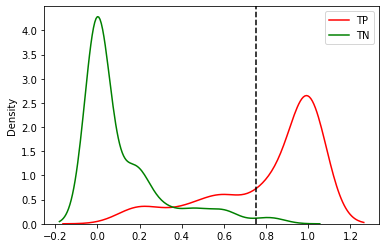

In [9]:
# KDEPLOTS just for understanding how a threshold work:
# green line to the right of the threshold are FPs
# red line to the left of the threshold are FNs

import seaborn as sns
sns.kdeplot(y_score[:,1][y_train == 1], alpha=0.5, color='red', label='TP')
sns.kdeplot(y_score[:,1][y_train == 0], alpha=0.5, color='green', label='TN')

# example
threshold = 0.75
plt.axvline(threshold, c='black', ls='dashed')

plt.legend()

[[0.38362761 0.        ]
 [0.61637239 0.        ]]


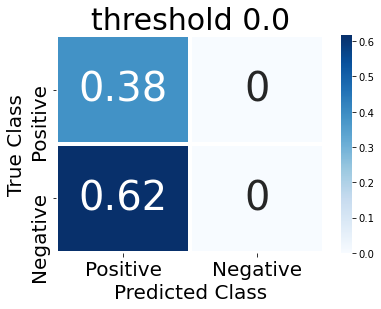

[[0.38362761 0.        ]
 [0.22792937 0.38844302]]


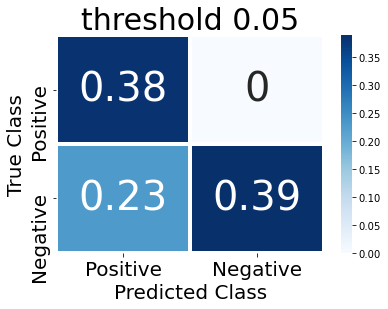

[[0.38362761 0.        ]
 [0.22792937 0.38844302]]


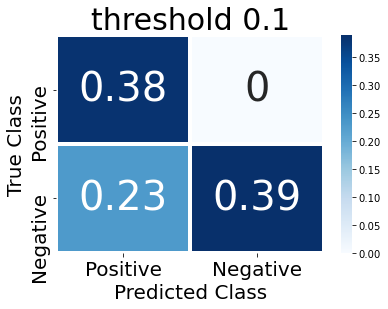

[[0.3788122  0.00481541]
 [0.1894061  0.42696629]]


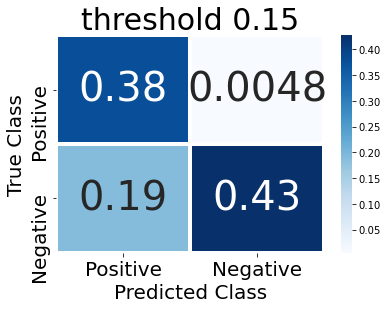

[[0.37399679 0.00963082]
 [0.16532905 0.45104334]]


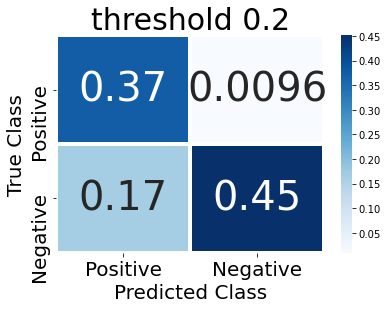

[[0.35794543 0.02568218]
 [0.1011236  0.5152488 ]]


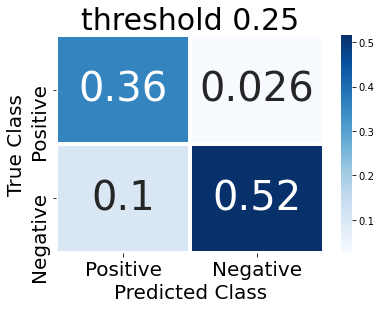

[[0.35152488 0.03210273]
 [0.08507223 0.53130016]]


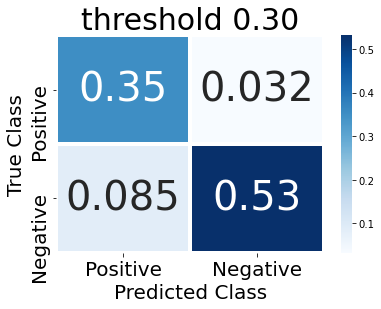

[[0.34510433 0.03852327]
 [0.07223114 0.54414125]]


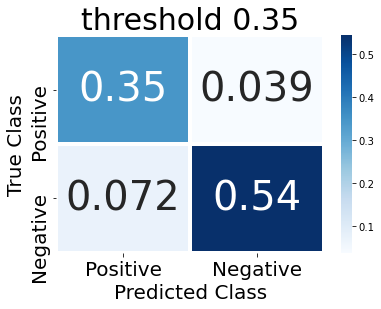

[[0.34510433 0.03852327]
 [0.07223114 0.54414125]]


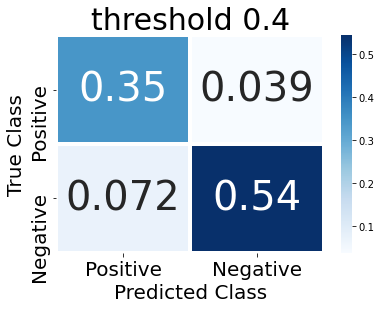

[[0.33707865 0.04654896]
 [0.06099518 0.55537721]]


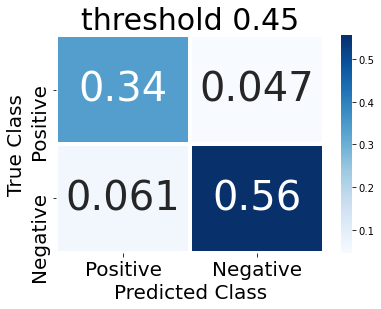

[[0.32905297 0.05457464]
 [0.05136437 0.56500803]]


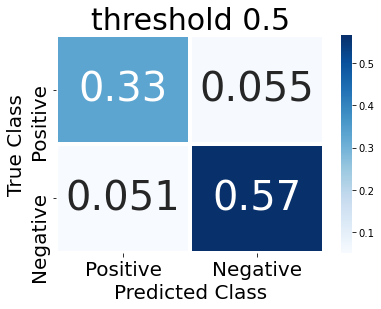

[[0.31942215 0.06420546]
 [0.04173355 0.57463884]]


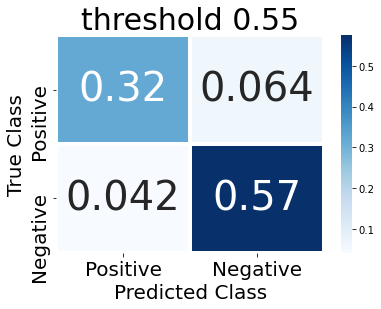

[[0.29213483 0.09149278]
 [0.02247191 0.59390048]]


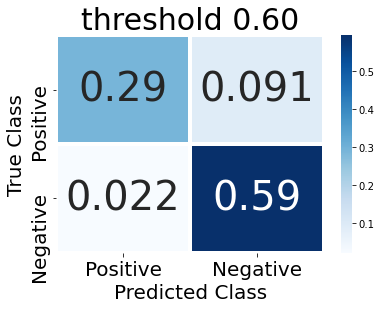

[[0.28410915 0.09951846]
 [0.0176565  0.59871589]]


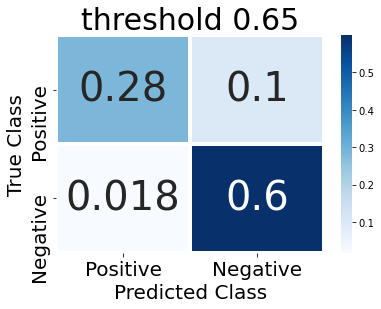

[[0.2776886  0.105939  ]
 [0.01444623 0.60192616]]


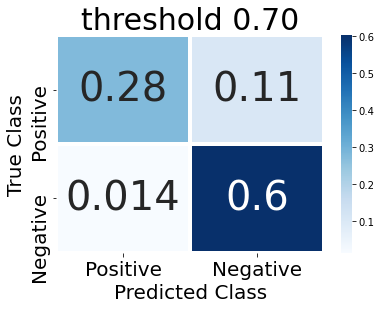

[[0.2776886  0.105939  ]
 [0.01444623 0.60192616]]


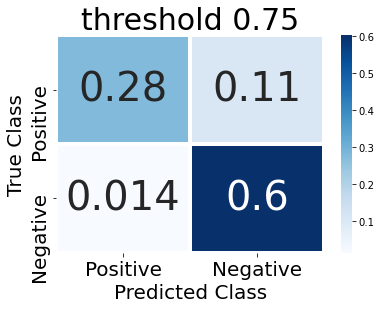

[[0.26805778 0.11556982]
 [0.01123596 0.60513644]]


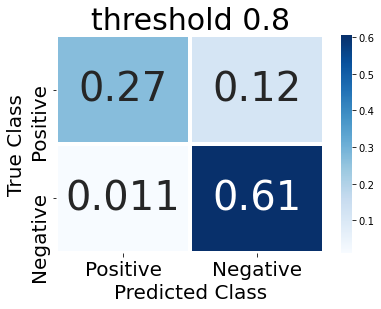

[[0.23274478 0.15088283]
 [0.00321027 0.61316212]]


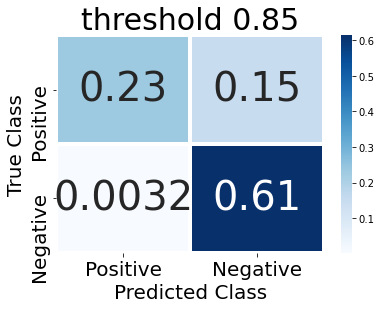

[[0.21187801 0.1717496 ]
 [0.         0.61637239]]


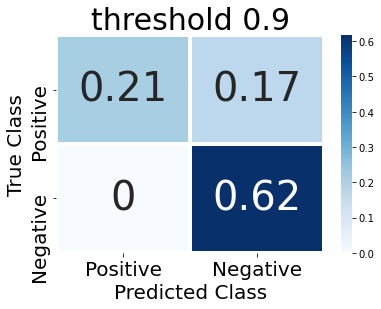

[[0.21187801 0.1717496 ]
 [0.         0.61637239]]


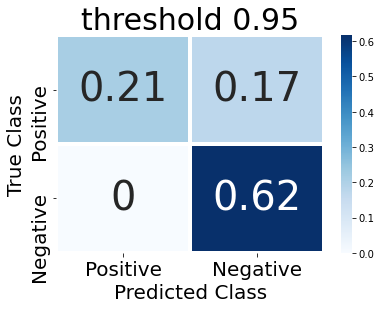

[[0.         0.38362761]
 [0.         0.61637239]]


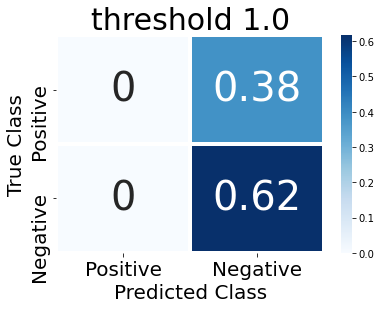

In [10]:
import seaborn as sns
for i, th in enumerate(np.arange(0,1.05,0.05)):
    if th==1:
        y_pred = [1 if v > th else 0 for v in clf.predict_proba(X_train)[:,1]]
    else:
        y_pred = [1 if v >= th else 0 for v in clf.predict_proba(X_train)[:,1]]
    cf = confusion_matrix(y_train, y_pred, labels=[1,0], normalize='all')
    print(cf)
    
    fig, ax = plt.subplots(figsize=(6,4)) 
    sns.heatmap(cf, annot=True, annot_kws={"size": 40}, linewidths=4, cmap="Blues")
    
    ax.set_xticklabels(['Positive','Negative'], fontsize=20)
    ax.set_xlabel('Predicted Class', fontsize=20)
    ax.set_yticklabels(['Positive','Negative'], fontsize=20)
    ax.set_ylabel('True Class', fontsize=20)
    
    plt.title('threshold ' + str(th)[:4], fontsize=30)
    #specify your path
    plt.savefig(r"C:\Users\salva\OneDrive\Desktop\prova\\" + str(i) + ".png")
    plt.show()

In [11]:
# CREATE A GIF OF THE VARYING CONFUSION MATRIX

import imageio

filenames = []
for i, th in enumerate(np.arange(0,1.05,0.05)):
    #specify your path
    filename = r"C:\Users\salva\OneDrive\Desktop\prova\\" + str(i) + ".png"
    filenames.append(filename)

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
    
imageio.mimsave('movie.mp4', images, fps=1.5)

## Bonus: GridSearch Visualization

In [12]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [13]:
param_list = {'max_depth': [1, 2, 3, 4],
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
             }

clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

grid_search = GridSearchCV(clf, param_grid=param_list, scoring='recall')
grid_search.fit(X_train, y_train)

res = grid_search.cv_results_

In [14]:
import csv

vals = grid_search.cv_results_['mean_test_score']
to_csv = grid_search.cv_results_['params']

with open('sample.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = ['recall','criterion','max_depth', 'min_samples_leaf', 'min_samples_split'])
    writer.writeheader()
    writer.writerows(to_csv)
    
df_to_csv = pd.DataFrame()
df_to_csv['recall'] = vals
df_to_csv['criterion'] = ['gini' for i in range(len(df_to_csv))]

In [15]:
param_d = {'max_depth': [], 'min_samples_leaf': [], 'min_samples_split': []}

for el in to_csv:
    for k, v in el.items():
        if v == None:
            param_d[k].append(0)
        else:
            param_d[k].append(v)
        
df_to_csv['max_depth'] = param_d['max_depth']
df_to_csv['min_samples_leaf'] = param_d['min_samples_leaf']
df_to_csv['min_samples_split'] = param_d['min_samples_split']

In [16]:
df_to_csv.to_csv('sample.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\heatmap3Dlib\plot3D.py:160: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot('111', projection='3d')


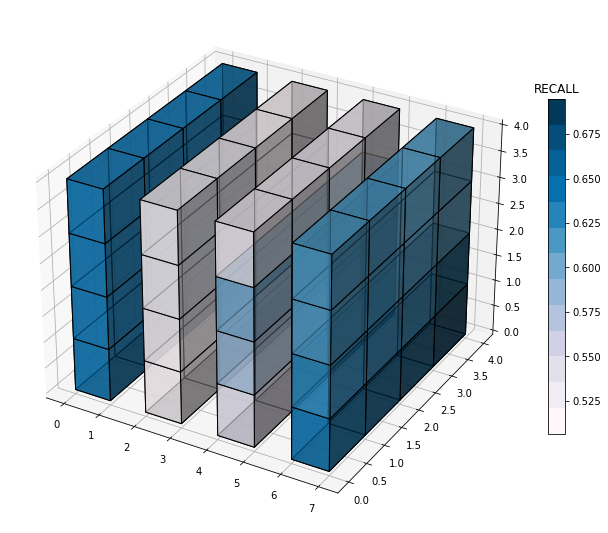

In [17]:
from heatmap3Dlib import plot3D as p3D

ax, fig, cbr = p3D.heatmap_3d(path= "sample.csv", metric="recall", optimal = [1, 1, 1], # TODO: optimal
                              crt = ("criterion",'gini'),
                              param1 = "max_depth",
                              param2 = "min_samples_split",
                              param3 = "min_samples_leaf",
                              modul=1
                             )

# TODO: adjust ticks